##### **Import the necessary libraries**

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#### **Reading and Displaying an Image:**

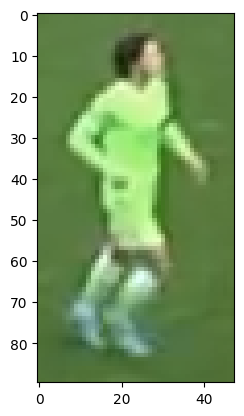

In [19]:
# Define the path to the image file
image_path = "../output_videos/cropped_image_02.png"

# Read the image from the specified path
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image)

# Show the image window
plt.show()


#### **Take top half of the images**

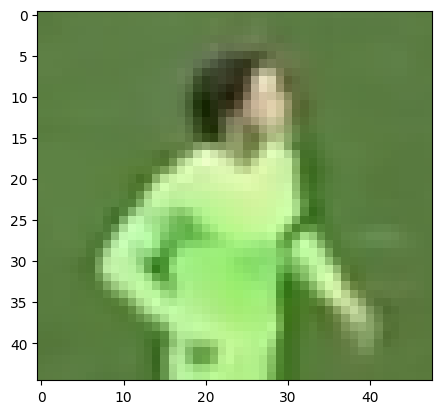

In [20]:
# Extract the top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]

# Display the extracted top half of the image using Matplotlib
plt.imshow(top_half_image)

# Show the image window
plt.show()


#### **Clusters the images into two clusters**

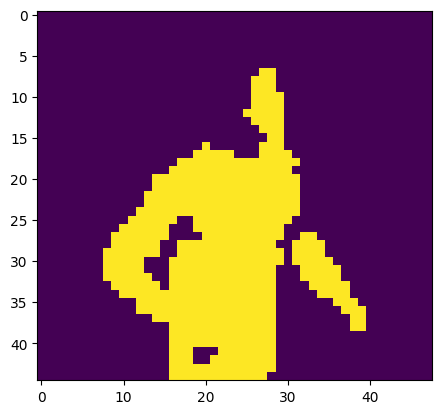

In [21]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [23]:
# Extract the clusters at the four corners of the clustered image
corner_clusters = [
    clustered_image[0, 0],   # Top-left corner
    clustered_image[0, -1],  # Top-right corner
    clustered_image[-1, 0],  # Bottom-left corner
    clustered_image[-1, -1]  # Bottom-right corner
]

# Determine the most frequent (mode) cluster from the corner clusters
# `set(corner_clusters)` creates a set of unique clusters
# `corner_clusters.count` counts occurrences of each cluster
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

# Print the most frequent cluster, assumed to be the non-player cluster
print(non_player_cluster)


0


In [24]:
# Determine the cluster index for the player cluster by subtracting the non-player cluster index from 1
player_cluster = 1 - non_player_cluster

# Print the index of the player cluster
print(player_cluster)


1


In [25]:
# Access the center coordinates of the player cluster from the KMeans clustering model
# `kmeans.cluster_centers_` contains the center coordinates of all clusters
# `player_cluster` specifies which cluster's center to retrieve
kmeans.cluster_centers_[player_cluster]

array([177.40075614, 229.79017013, 140.87901701])